In [1]:
# This is an example GPT style decoder only transformer model and example dataset
# This an example of the use of the icanswim/cosmosis repo for data science and 
# machine learning projects

import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../')

from dataset import TinyShakes

from cosmosis.model import GPT
from cosmosis.dataset import AsTensor
from cosmosis.learning import Learn, Selector, Metrics

from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau


In [2]:
ds_param = {'transforms': {'X1': [AsTensor()],
                           'X2': [AsTensor()]},
            'block_size': 6,
            'n': 1}

ts = TinyShakes(**ds_param)
print(ts[0])
print(ts[0]['X1'].shape)
print(ts[0]['X2'].shape)

tinyshakes.txt loaded from saved file in ../gpt/data/
tokens loaded from file ./data/tinyskakes_encoded.bin
len(self.ds_idx):  1
data.nbytes:  676050
CDataset created...
{'X1': tensor([ 5962, 22307,    25,   198,  8421,   356]), 'X2': tensor([22307,    25,   198,  8421,   356,  5120])}
torch.Size([6])
torch.Size([6])


In [20]:
ds_param = {'transforms': {'X1': [AsTensor()],
                           'X2': [AsTensor()]},
            'block_size': 20,
            'prompt': 'All the worlds a stage and all the men and women merely'}

ts_infer = TinyShakes(**ds_param)
print(ts_infer[0])
print(ts_infer[0]['X1'].shape)
print(ts_infer[0]['X2'].shape)

len(self.ds_idx):  1
data.nbytes:  510
CDataset created...
{'X1': tensor([10919,  1657,   832,   331,  8623,  4324,   644,   220,   220,   220,
          220,   220,   220,   220,   220,   220,   220,   220,   220,   220]), 'X2': tensor([1657,  832,  331, 8623, 4324,  644,  220,  220,  220,  220,  220,  220,
         220,  220,  220,  220,  220,  220,  220,  220])}
torch.Size([20])
torch.Size([20])


In [4]:
# load model
model_param = {'device': 'cpu',
               'd_model': 32, # matches embedding dimension
               'd_vocab': 50304, # matches embedding vocab
               'n_head': 2, 
               'num_layers': 2,
               'linear_head': True,
               'probs': False, # softmax
               'tokens': False, # multinomial
               'transpose': False, 
               'embed_param': {'X1': (50304, 32, None, True),
                               'X2': (50304, 32, None, True)}} 

gpt = GPT(model_param)

CModel loaded...


In [5]:
# load single data example into model and examine output
data = ts_infer[0]
out = gpt(data)
print(out)
print(out.shape)
print(out.dtype)

tensor([[ 0.2514,  0.0000, -0.0400,  ..., -0.7752,  1.4809,  0.0000],
        [-0.7551,  0.3159, -0.8596,  ..., -0.1780,  1.1089,  0.4158],
        [-0.8491,  0.2715, -0.5409,  ...,  0.3434,  0.2263, -0.8506],
        [-0.1524,  0.4755, -0.9839,  ...,  0.4668,  0.6346,  1.1039],
        [ 0.6630, -0.2519, -0.5125,  ..., -0.1951,  0.7733,  1.4637],
        [ 0.8072, -1.0922,  0.3838,  ..., -0.4841, -0.4446,  0.3541]],
       grad_fn=<MulBackward0>)
torch.Size([6, 50304])
torch.float32


In [6]:
# load generated logits and target tokens into loss function
cel_func = CrossEntropyLoss()
prompt_tokens = data['X2']
print('prompt_tokens: ', prompt_tokens, prompt_tokens.shape, prompt_tokens.dtype)

target_tokens = data['X1']
target_tokens.unsqueeze(0)
print('target_tokens: ', target_tokens, target_tokens.shape, target_tokens.dtype)

generated_tokens = out
generated_tokens.unsqueeze(0)
print('generated_tokens: ', generated_tokens.unsqueeze(0), generated_tokens.shape, generated_tokens.dtype)

loss = cel_func(generated_tokens, target_tokens)
print('loss: ', loss)

prompt_tokens:  tensor([362, 513, 604, 642, 718, 767]) torch.Size([6]) torch.int64
target_tokens:  tensor([ 16, 362, 513, 604, 642, 718]) torch.Size([6]) torch.int64
generated_tokens:  tensor([[[ 0.2514,  0.0000, -0.0400,  ..., -0.7752,  1.4809,  0.0000],
         [-0.7551,  0.3159, -0.8596,  ..., -0.1780,  1.1089,  0.4158],
         [-0.8491,  0.2715, -0.5409,  ...,  0.3434,  0.2263, -0.8506],
         [-0.1524,  0.4755, -0.9839,  ...,  0.4668,  0.6346,  1.1039],
         [ 0.6630, -0.2519, -0.5125,  ..., -0.1951,  0.7733,  1.4637],
         [ 0.8072, -1.0922,  0.3838,  ..., -0.4841, -0.4446,  0.3541]]],
       grad_fn=<UnsqueezeBackward0>) torch.Size([6, 50304]) torch.float32
loss:  tensor(10.6567, grad_fn=<NllLossBackward0>)


tinyshakes.txt loaded from saved file in ../gpt/data/
tokens loaded from file ./data/tinyskakes_encoded.bin
len(self.ds_idx):  2000
data.nbytes:  676050
CDataset created...
CModel loaded...
running model on gpu...

...........................
learning time: 0:00:11.380678
epoch: 0, lr: 0.01
train loss: 0.4276858068060601, val loss: 0.3173290623558892

last targets: 
 believe, yet I mistrust.

LUCENTIO:
Mistrust it not: for, sure, AEacides
Was Ajax,

last predictions: 

'sI,


...........................
learning time: 0:00:21.769856
epoch: 1, lr: 0.01
train loss: 0.2734254925757989, val loss: 0.2569601560632388

last targets: 
 bring
My tongue to such a pace:--'Look, sir, my wounds!
I got them in my country's service, when


last predictions: 
 for



...........................
learning time: 0:00:32.056250
epoch: 2, lr: 0.01
train loss: 0.22765984566047273, val loss: 0.23221813721789253

last targets: 
ARET:
O, kill me too!

GLOUCESTER:
Marry, and shall.

KING EDWARD

last prediction

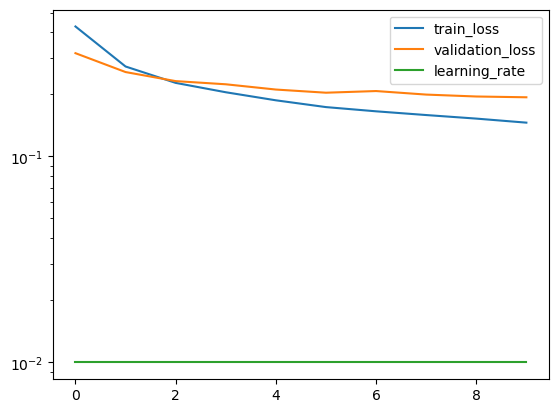

In [2]:
# put all together in a learner
ds_param = {'train_param': {'transforms': {'X1': [AsTensor()],
                                           'X2': [AsTensor()]},
                            'block_size': 30,
                            'n': 2000}}

model_param = {'device': 'cuda',
               'd_model': 16, # matches embedding dimension
               'd_vocab': 50304, # matches embedding vocab
               'n_head': 4, 
               'num_layers': 3,
               'linear_head': True,
               'probs': False,
               'tokens': False,
               'transpose': True, 
               'embed_param': {'X1': (50304, 16, None, True),
                               'X2': (50304, 16, None, True)}} 
                                       
metrics_param = {'metric_name': 'transformer',
                 'report_interval': 10,
                 'log_plot': True,
                 'min_lr': .005} # break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 2,
               'cooldown': 2}

learn = Learn([TinyShakes], 
              GPT,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=16, epochs=10, gpu=True, squeeze_y_pred=True, 
              save_model='gpt_test_model', target='X1')

In [6]:
# inference
ds_param = {'train_param': {'transforms': {'X1': [AsTensor()],
                                           'X2': [AsTensor()]},
                            'block_size': 10,
                            'prompt': 'All the worlds a stage and all the men and women merely'}}

model_param = {'device': 'cuda',
               'd_model': 16, # matches embedding dimension
               'd_vocab': 50304, # matches embedding vocab
               'n_head': 4, 
               'num_layers': 3,
               'linear_head': True,
               'probs': False,
               'tokens': False,
               'transpose': True, 
               'embed_param': {'X1': (50304, 16, None, True),
                               'X2': (50304, 16, None, True)}} 

                                       
metrics_param = {'metric_name': 'transformer',
                 'report_interval': 10,
                 'log_plot': True,
                 'min_lr': .005} # break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 2,
               'cooldown': 2}

learn = Learn([TinyShakes], 
              GPT,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=None,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=1, epochs=3, gpu=True, squeeze_y_pred=True, 
              load_model='gpt_test_model.pth', target='X1')


len(self.ds_idx):  1
data.nbytes:  24
CDataset created...
CModel loaded...
model loaded from state_dict...
running model on gpu...

...........................
learning time: 0:00:00.080399
last predictions: 
lmost

inference 2024-12-28 20:19:55.622229 complete and saved to csv...


In [4]:
learn.metrics.predictions

[' amongstad bear their here motherCAPakes these mother',
 ' hisad were their here encounterCAPA theseSh',
 ' very presM things than motherestad fromCI']